okay...let's try to import some data and then clean it up using pandas in order to fit a curve
https://www.ishares.com/us/products/239566/ishares-iboxx-investment-grade-corporate-bond-etf

In [5]:
import pandas as pd

In [6]:
df = pd.read_excel('C:/Users/dstoc/Documents/Python Scripts/First Project/QLTA.xlsx')

In [7]:
print(df.head(10))

                                Name                 Sector   Asset Class  \
0       ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical  Fixed Income   
1  PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
2  PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
3              MICROSOFT CORPORATION             Technology  Fixed Income   
4                           VISA INC             Technology  Fixed Income   
5          WELLS FARGO & COMPANY MTN                Banking  Fixed Income   
6          WELLS FARGO & COMPANY MTN                Banking  Fixed Income   
7              MICROSOFT CORPORATION             Technology  Fixed Income   
8                      CITIGROUP INC                Banking  Fixed Income   
9                          APPLE INC             Technology  Fixed Income   

       CUSIP  Market Value  Weight (%)  Notional Value  Par Value  \
0  03522AAJ9    3972588.66     0.45249      3972588.66    4105000   
1  716973AG7  

In [8]:
print(df.tail)

<bound method NDFrame.tail of                                     Name                 Sector   Asset Class  \
0           ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical  Fixed Income   
1      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
2      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
3                  MICROSOFT CORPORATION             Technology  Fixed Income   
4                               VISA INC             Technology  Fixed Income   
...                                  ...                    ...           ...   
2735                         ONE GAS INC            Natural Gas  Fixed Income   
2736  MITSUBISHI UFJ FINANCIAL GROUP INC                Banking  Fixed Income   
2737                           3M CO MTN          Capital Goods  Fixed Income   
2738         JOHN DEERE CAPITAL CORP MTN          Capital Goods  Fixed Income   
2739         JOHN DEERE CAPITAL CORP MTN          Capital Goods  Fixed Income  

In [9]:
list(df.columns)

['Name',
 'Sector',
 'Asset Class',
 'CUSIP',
 'Market Value',
 'Weight (%)',
 'Notional Value',
 'Par Value',
 'Location',
 'Exchange',
 'Currency',
 'Duration',
 'YTM (%)',
 'FX Rate',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Call (%)',
 'Yield to Worst (%)',
 'Real Duration',
 'Real YTM (%)',
 'Market Currency',
 'Accrual Date',
 'Effective Date']

In [10]:
df2 = df[['Name',
 'Sector',
 'Weight (%)',
 'Notional Value',
 'CUSIP',
 #'Price',
 'Duration',
 'YTM (%)',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Worst (%)']]

df2 = df2.iloc[0:len(df2),]

In [11]:
from datetime import datetime
date_str = "1-Feb-46"
date_format = "%d-%b-%y"

# Convert the date string to a datetime object
date_obj = datetime.strptime(date_str, date_format)

# Get the current date as a datetime object
current_date = datetime.now()

# Calculate the difference in days
years_away = (date_obj - current_date).days / 365

print(years_away)

22.654794520547945


In [12]:
import pandas as pd
from datetime import datetime

# Create a sample DataFrame with a 'Date' column
data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
df_example = pd.DataFrame(data)

# Define the date format
date_format = "%d-%b-%y"

# Define a function to convert a date string to the number of days away
def convert_to_days(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    days_away = (date_obj - current_date).days
    return days_away

# Apply the function to the 'Date' column
df_example['Days Away'] = df_example['Date'].apply(convert_to_days)

# Print the updated DataFrame
print(df_example)


        Date  Days Away
0  13-May-19      -1492
1  15-Jun-19      -1459
2  22-Jul-19      -1422


In [13]:
import pandas as pd
from datetime import datetime, timedelta

# Create a sample DataFrame with a 'Date' column
#data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
#df = pd.DataFrame(data)

# Define the date format
date_format = "%b %d, %Y"

# Define a function to convert a date string to the number of days away
def convert_to_years(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    years_away = (date_obj - current_date).days / 365

    if years_away < 0:
        years_away = years_away + 100  # Add 100 years (365.25 days per year on average)
    
    return years_away

# Apply the function to the 'Date' column
df2['MaturityYears'] = df2['Maturity'].apply(convert_to_years)

# Print the updated DataFrame
print(df2)


                                    Name                 Sector  Weight (%)  \
0           ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical     0.45249   
1      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical     0.21273   
2      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical     0.18638   
3                  MICROSOFT CORPORATION             Technology     0.16505   
4                               VISA INC             Technology     0.15571   
...                                  ...                    ...         ...   
2735                         ONE GAS INC            Natural Gas     0.00105   
2736  MITSUBISHI UFJ FINANCIAL GROUP INC                Banking     0.00104   
2737                           3M CO MTN          Capital Goods     0.00093   
2738         JOHN DEERE CAPITAL CORP MTN          Capital Goods     0.00058   
2739         JOHN DEERE CAPITAL CORP MTN          Capital Goods     0.00058   

      Notional Value      CUSIP  Duration  YTM (%) 

In [14]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, errorfn_ns_ols
from matplotlib import pyplot as plt

In [15]:
df2['Sector'].unique()

array(['Consumer Non-Cyclical', 'Technology', 'Banking',
       'Consumer Cyclical', 'Communications', 'Energy', 'Insurance',
       'Transportation', 'Basic Industry', 'Electric', 'Capital Goods',
       'Brokerage/Asset Managers/Exchanges', 'Reits', 'Natural Gas',
       'Industrial Other', 'Financial Other'], dtype=object)

In [16]:
df2.groupby('Sector')[["YTM (%)"]].agg(['min', 'max'])

YTM (%)       
                                       min    max
Sector                                           
Banking                               3.88  10.70
Basic Industry                        4.39   5.44
Brokerage/Asset Managers/Exchanges    4.42   6.09
Capital Goods                         4.35   5.65
Communications                        4.47   5.75
Consumer Cyclical                     4.19   5.87
Consumer Non-Cyclical                 4.04   6.17
Electric                              4.61   5.96
Energy                                4.22   5.91
Financial Other                       4.96   5.79
Industrial Other                      4.48   5.64
Insurance                             3.89   5.71
Natural Gas                           4.59   5.63
Reits                                 4.75   5.99
Technology                            4.01   5.88
Transportation                        4.41   6.57

In [75]:
def my_NS_func(x_df):
    time = np.array(x_df["MaturityYears"])
    yld = np.array(x_df["Yield to Worst (%)"])

    #plt.plot(time,yld, "r+"); 
    curve, status = calibrate_ns_ols(
        time,yld, tau0=1.0
    )  # starting value of 1.0 for the optimization of tau
    assert status.success
    curve  
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.suptitle("Calibrated Nelson-Siegel Curve")
    ax.plot(time, yld, "r+")
    t2 = np.linspace(0, 50)
    ax.plot(t2, curve(t2), "b-");

    Yhat = x_df['Yield to Worst (%)'].apply(curve)
    x_df.loc[:,'Yhat'] = Yhat

    Spread_to_Curve = x_df['Yield to Worst (%)'] - x_df['Yhat']
    return Spread_to_Curve




In [43]:
def custom_function(column):
    return column['MaturityYears'] * column['Yield to Worst (%)']


In [64]:
df_x['CustomOutput'] = df_x.groupby('Sector').apply(my_NS_func).reset_index(level=0, drop=True)
df_x

,Name,Sector,MaturityYears,Yield to Worst (%),CustomOutput
3,MICROSOFT CORPORATION,Technology,28.780822,4.56,-0.066778
4,VISA INC,Technology,2.506849,4.67,0.044860
5,WELLS FARGO & COMPANY MTN,Banking,27.827397,5.62,0.466461
6,WELLS FARGO & COMPANY MTN,Banking,10.123288,5.41,0.277527


,Name,Sector,Weight (%),Notional Value,CUSIP,Duration,YTM (%),Maturity,Coupon (%),Mod. Duration,Yield to Worst (%),MaturityYears,CustomOutput,Spread to Curve,Implied Performance
0,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,0.45249,3972588.66,03522AAJ9,13.02,5.27,"Feb 01, 2046",4.90,13.10,5.27,22.654795,0.768457,0.768457,15.275305
1,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,0.21273,1867674.61,716973AG7,15.16,5.09,"May 19, 2053",5.30,15.13,5.09,29.953425,0.596884,0.596884,14.138765
2,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,0.18638,1636331.22,716973AE2,7.83,4.69,"May 19, 2033",4.75,7.85,4.69,9.939726,0.212457,0.212457,6.353540
3,MICROSOFT CORPORATION,Technology,0.16505,1448999.23,594918CE2,17.40,4.56,"Mar 17, 2052",2.92,17.41,4.56,28.780822,0.070159,0.070159,5.780766
4,VISA INC,Technology,0.15571,1367019.04,92826CAD4,2.28,4.67,"Dec 14, 2025",3.15,2.35,4.67,2.506849,0.180597,0.180597,5.081762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,ONE GAS INC,Natural Gas,0.00105,9199.74,68235PAF5,12.44,5.44,"Feb 01, 2044",4.66,12.50,5.44,20.652055,0.646938,0.646938,13.487905
2736,MITSUBISHI UFJ FINANCIAL GROUP INC,Banking,0.00104,9159.87,606822BB9,10.68,5.25,"Jul 26, 2038",4.29,10.59,5.25,15.128767,-0.114662,-0.114662,4.025407
2737,3M CO MTN,Capital Goods,0.00093,8179.49,88579YAW1,14.46,5.65,"Sep 19, 2046",3.13,14.49,5.65,23.284932,1.060055,1.060055,20.978393
2738,JOHN DEERE CAPITAL CORP MTN,Capital Goods,0.00058,5117.13,24422EWT2,2.51,4.64,"Mar 03, 2026",5.05,2.51,4.64,2.723288,0.066424,0.066424,4.806725


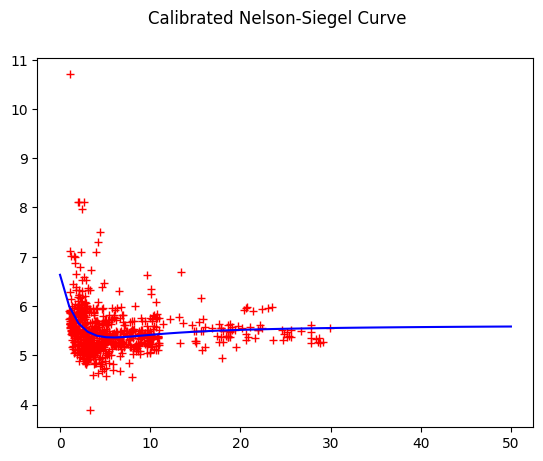

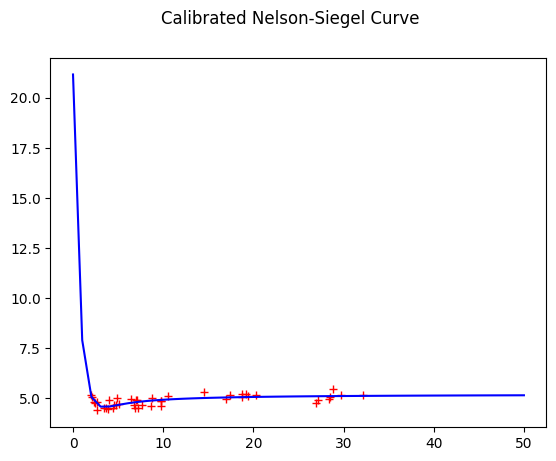

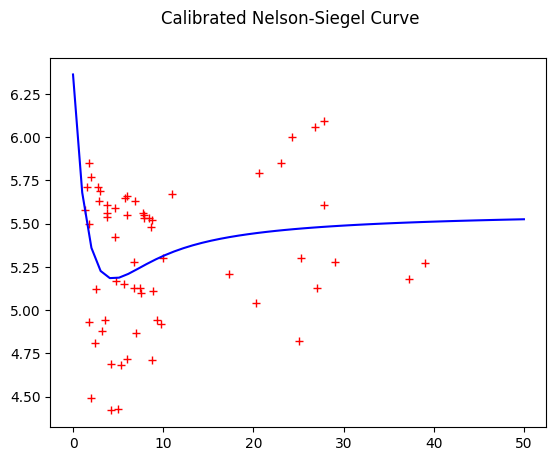

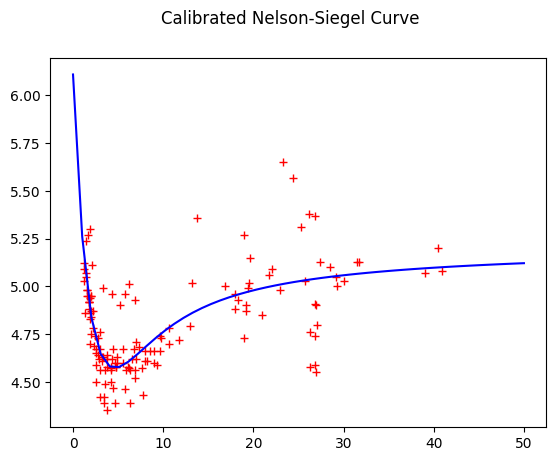

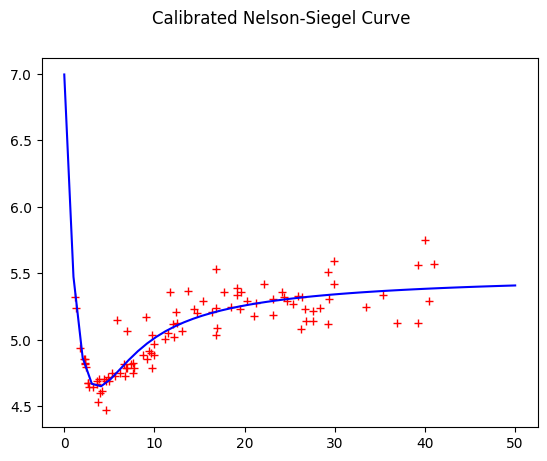

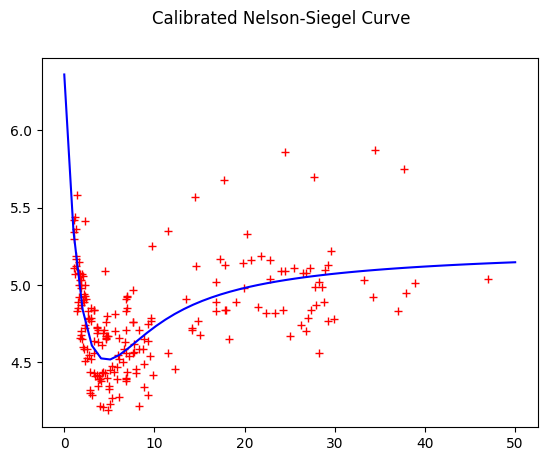

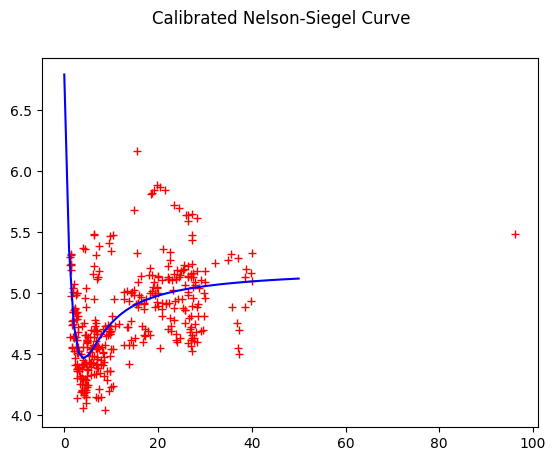

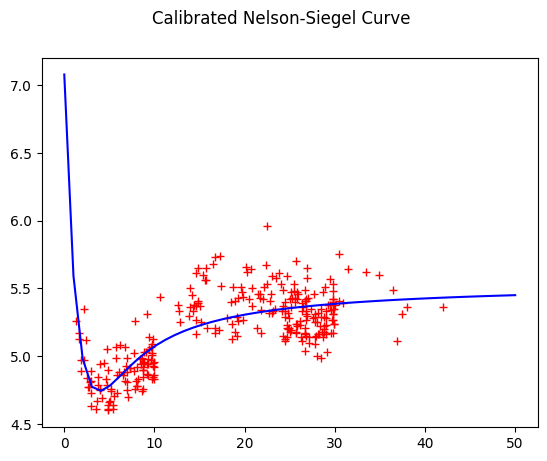

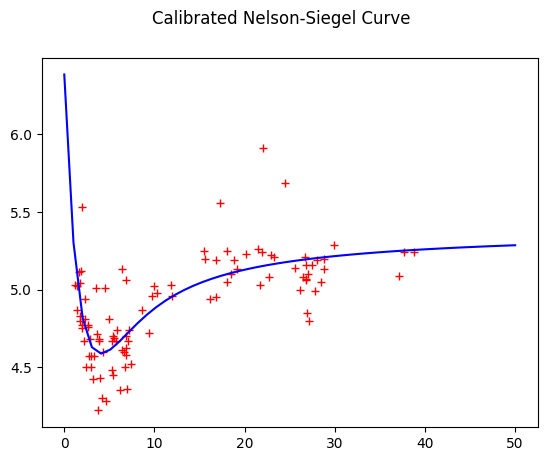

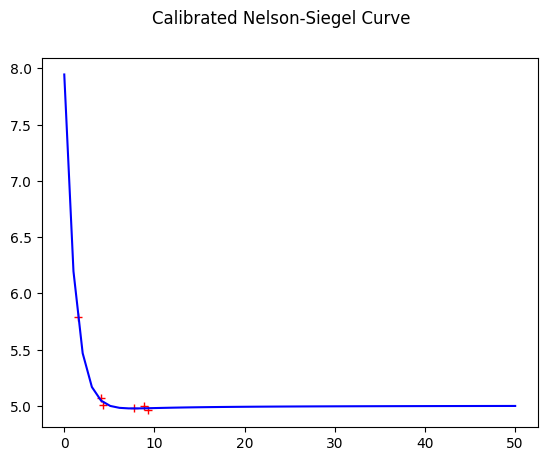

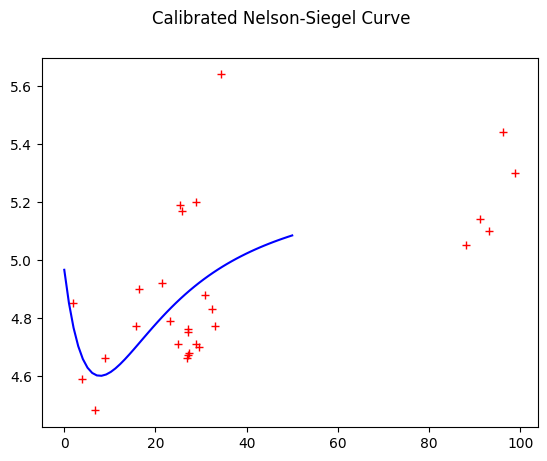

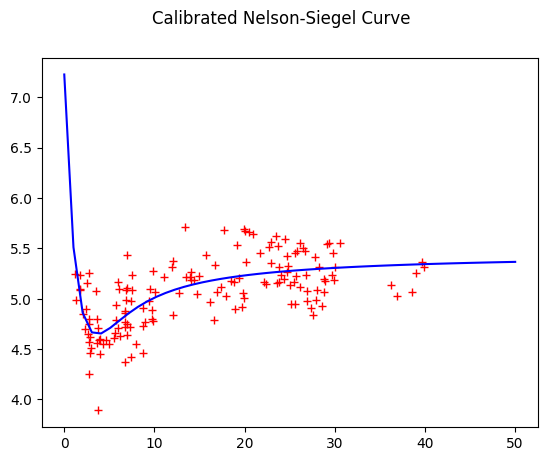

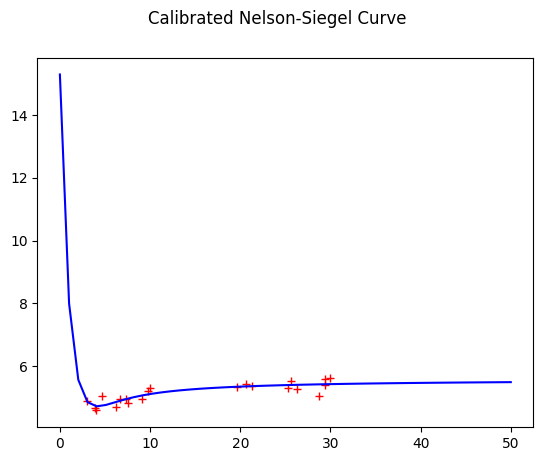

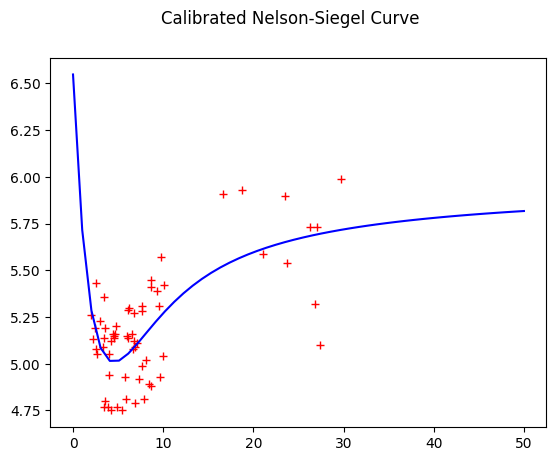

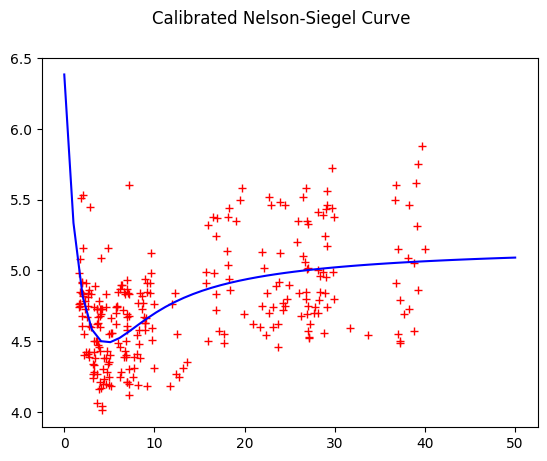

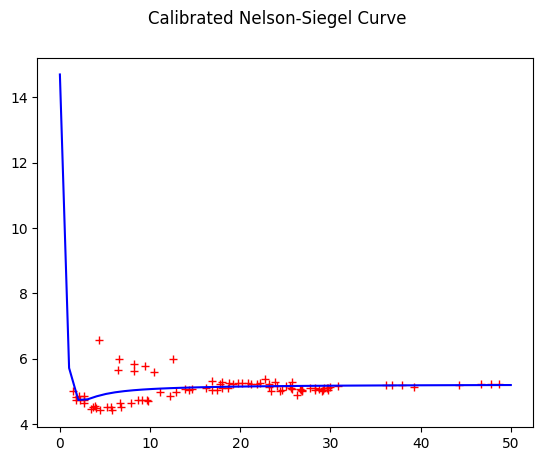

In [76]:
df3 = df2
df3['Spread to Curve'] = df3.groupby('Sector').apply(my_NS_func).reset_index(level=0, drop=True)
df3

# Calculate distance of each bond's yield from the curve

# Calculate additional performance driven by compression of bond's yield to the curve
% Change in Price = - Duration x Change in Spread

In [73]:
df3.loc[:,'Implied Performance'] = (df3['Duration'] * df3['Spread to Curve']) + df3['Yield to Worst (%)']

In [74]:
df_final = df3
# Write the DataFrame to an Excel file
df_final.to_excel('NS_output.xlsx', index=False)